### Initialization

In [390]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [391]:
# Defining base_path relatively to current os
if os.name == 'posix': # Unix/Linux/Mac OS
    base_path = '/Users/mohamedshoala/Documents/third semester/model identification and machine learning/machine learning/assignment/ML-project/src/'
elif os.name == 'nt': # Windows
    base_path = '../../ML-project/src/'

### EDA on training_parameters_df

In [392]:
# Loading the training_parameters dataframe
training_parameters_df = pd.read_csv(base_path + 'training_parameters.csv')
print(training_parameters_df.shape); training_parameters_df.head()

(3000, 6)


,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex
0,D,5,3,0.11,0.11,0
1,B,5,4,0.20,0.29,1
2,A,2,5,0.15,0.25,2
3,A,2,4,0.25,0.25,3
4,C,4,5,0.16,0.18,4


In [393]:
training_parameters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SurfaceType             3000 non-null   object 
 1   RainfallIntensity       3000 non-null   int64  
 2   init_max_hour           3000 non-null   int64  
 3   DrainageSystemCapacity  3000 non-null   float64
 4   GreenSpaceRatio         3000 non-null   float64
 5   ObservationIndex        3000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 140.8+ KB


SurfaceType
C    788
A    748
D    736
B    728
Name: count, dtype: int64


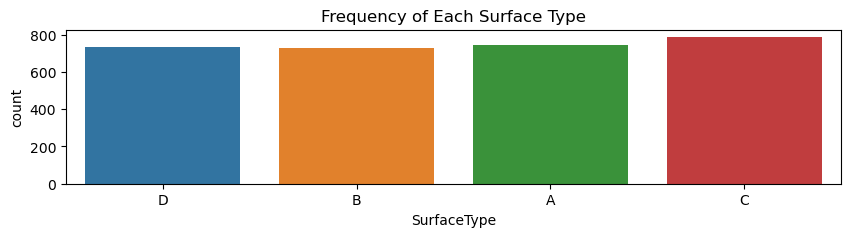

In [394]:
# For categorical variables
print(training_parameters_df['SurfaceType'].value_counts())

# Bar plot for the 'SurfaceType' categorical column
plt.figure(figsize=(10, 2))
sns.countplot(x='SurfaceType', data=training_parameters_df)
plt.title('Frequency of Each Surface Type')
plt.show()

       RainfallIntensity  init_max_hour  DrainageSystemCapacity  \
count        3000.000000    3000.000000             3000.000000   
mean            2.157667       4.010667                0.199047   
std            36.604682       0.814928                0.057176   
min          -999.000000       3.000000                0.100000   
25%             2.000000       3.000000                0.150000   
50%             4.000000       4.000000                0.200000   
75%             4.000000       5.000000                0.250000   
max             5.000000       5.000000                0.300000   

       GreenSpaceRatio  ObservationIndex  
count      3000.000000       3000.000000  
mean          0.200780       1499.500000  
std           0.059045        866.169729  
min           0.100000          0.000000  
25%           0.150000        749.750000  
50%           0.200000       1499.500000  
75%           0.250000       2249.250000  
max           0.300000       2999.000000  


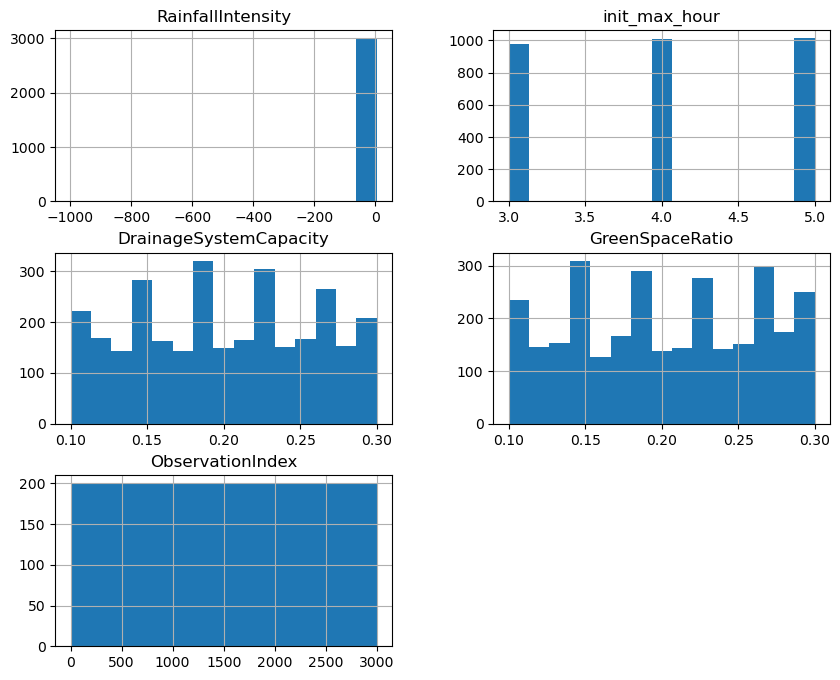

In [395]:
# Descriptive statistics
print(training_parameters_df.describe())

# Histograms for numerical columns
training_parameters_df.hist(bins=15, figsize=(10, 8))
plt.show()

<Axes: >

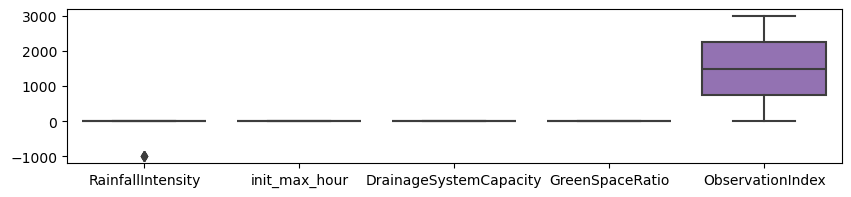

In [396]:
plt.figure(figsize=(10, 2))
sns.boxplot(training_parameters_df)

In [397]:
# Calculating the upper and lower limits
Q1 = training_parameters_df['RainfallIntensity'].quantile(0.25)
Q3 = training_parameters_df['RainfallIntensity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR

# Creating an array indicating the outlier rows
outlier_rows = np.where(training_parameters_df['RainfallIntensity'] <= lower)[0]
training_parameters_df.loc[outlier_rows]

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex
79,B,-999,3,0.11,0.27,79
141,C,-999,5,0.19,0.18,141
1737,A,-999,3,0.19,0.28,1737
1738,D,-999,4,0.18,0.11,1738


In [398]:
# Replacing -999 with NaN for more accurate calculations
training_parameters_df.loc[outlier_rows, 'RainfallIntensity'] = pd.NA

# Replace NaN values with the median (or mean, if appropriate)
replacement_value = training_parameters_df['RainfallIntensity'].median()
training_parameters_df['RainfallIntensity'].fillna(replacement_value, inplace=True)
training_parameters_df.loc[outlier_rows]

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex
79,B,4.0,3,0.11,0.27,79
141,C,4.0,5,0.19,0.18,141
1737,A,4.0,3,0.19,0.28,1737
1738,D,4.0,4,0.18,0.11,1738


<Axes: >

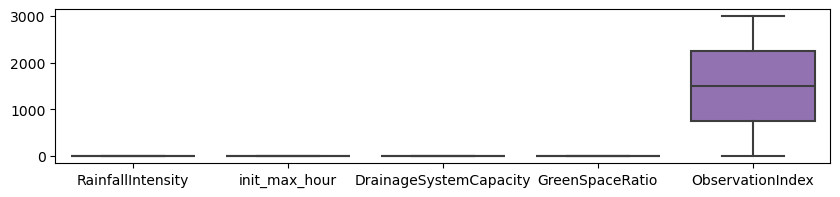

In [399]:
plt.figure(figsize=(10, 2))
sns.boxplot(training_parameters_df)

In [400]:
# Checking for duplicate rows
print(f"Number of duplicate rows: {training_parameters_df.duplicated().sum()}")

Number of duplicate rows: 0


### EDA on edge_info_df + merged csv

In [401]:
# Loading the edge_info dataframe
edge_info_df = pd.read_csv(base_path + 'edge_info.csv')
print(edge_info_df.shape); edge_info_df.head()

(191, 5)


,head_id,tail_id,longitude,latitude,altitude
0,151779659,153066427,-95.382821,29.798740,957.0
1,151779659,152426116,-95.383237,29.798445,921.2
2,151779659,152136099,-95.382354,29.797764,876.0
3,151779763,152437059,-95.380082,29.795224,897.0
4,151779763,152541741,-95.380394,29.796295,877.6


In [402]:
# Creating a single dataframe out of the single observation ones
merged_data = []
for i in range(3000):
    file_path = os.path.join(base_path, f'training/{i}.csv'.format(type))
    observation_df = pd.read_csv(file_path) # Loading the observation dataframe
    tmp_df = edge_info_df.merge(observation_df[['head_id', 'tail_id', 'flooded_init', 'flooded_final']], on=['head_id', 'tail_id']) # Merge with base_df on head_id and tail_id
    tmp_df['ObservationIndex'] = i # Add the index column to identify the observation
    merged_data.append(tmp_df) # Append the merged dataframe to the list

merged_df = pd.concat(merged_data).reset_index(drop=True) # Concatenate all merged dataframes


In [403]:
# merged_df = integrate('training')
print(merged_df.shape); merged_df.head()

(573000, 8)


,head_id,tail_id,longitude,latitude,altitude,flooded_init,flooded_final,ObservationIndex
0,151779659,153066427,-95.382821,29.798740,957.0,False,False,0
1,151779659,152426116,-95.383237,29.798445,921.2,False,False,0
2,151779659,152136099,-95.382354,29.797764,876.0,False,False,0
3,151779763,152437059,-95.380082,29.795224,897.0,False,False,0
4,151779763,152541741,-95.380394,29.796295,877.6,False,False,0


In [404]:
# Checking if there is any observation in which no flooding happens
indices_without_true = []

for name, group in merged_df.groupby('ObservationIndex'):
    if not group['flooded_final'].any():  # Check if no 'flooded_final' is True in the group
        indices_without_true.append(name)

print("Indices without any 'flooded_final' == True:")
print(indices_without_true)

Indices without any 'flooded_final' == True:
[]


All the 3000 simulations have at least one TRUE value for flooded_final

In [405]:
# Checking for unbalances
columns_of_interest = ['flooded_init', 'flooded_final']
for column in columns_of_interest:
    print(f"Value counts for column: {column}")
    print(merged_df[column].value_counts())
    print("\n")

Value counts for column: flooded_init
flooded_init
False    562711
True      10289
Name: count, dtype: int64


Value counts for column: flooded_final
flooded_final
False    479961
True      93039
Name: count, dtype: int64




We decide not to downsample

In [406]:
# Count rows where both 'flooded_init' and 'flooded_final' are True
count_true_in_both = merged_df[(merged_df['flooded_init'] == True) & (merged_df['flooded_final'] == True)].shape[0]
print(f"Number of rows where both 'flooded_init' and 'flooded_final' are True: {count_true_in_both}")

Number of rows where both 'flooded_init' and 'flooded_final' are True: 10289


Now we know that all the edges that started flooded remain flooded

Considering a single case, we want to understand if there is any correlation between sharing one intersection with an initially flooded street and the likelyhood of being flooded

In [407]:
# Picking a single observation scenario
single_df = merged_df[(merged_df['ObservationIndex'] == 0) ]

In [408]:
# Group by 'head_id' and count 'True' instances in 'flooded_final'
for head_id, group in single_df.groupby('head_id'):
    true_count = group['flooded_final'].sum()  # Count the number of True values
    print(f"head_id: {head_id}, Number of True instances: {true_count}")

head_id: 151779659, Number of True instances: 0
head_id: 151779763, Number of True instances: 0
head_id: 152130254, Number of True instances: 0
head_id: 152130257, Number of True instances: 0
head_id: 152130265, Number of True instances: 0
head_id: 152130268, Number of True instances: 0
head_id: 152130280, Number of True instances: 0
head_id: 152136099, Number of True instances: 0
head_id: 152136103, Number of True instances: 0
head_id: 152136106, Number of True instances: 0
head_id: 152136108, Number of True instances: 0
head_id: 152136110, Number of True instances: 0
head_id: 152136112, Number of True instances: 0
head_id: 152205779, Number of True instances: 0
head_id: 152223474, Number of True instances: 0
head_id: 152331933, Number of True instances: 0
head_id: 152331936, Number of True instances: 0
head_id: 152341226, Number of True instances: 2
head_id: 152341229, Number of True instances: 0
head_id: 152361419, Number of True instances: 2
head_id: 152361421, Number of True insta

In [409]:
# Filter rows where either 'flooded_final' or 'flooded_init' is True
flooded_rows = single_df[(single_df['flooded_final'] == True) | (single_df['flooded_init'] == True)]

# Iterate through these rows and check for matching 'head_id' or 'tail_id' in the entire DataFrame
for index, row in flooded_rows.iterrows():
    head_id = row['head_id']
    tail_id = row['tail_id']

    # Find all rows with the same 'head_id' or 'tail_id'
    matching_rows = single_df[(single_df['head_id'] == head_id) | (single_df['tail_id'] == tail_id)]

    # Print the relevant information including 'flooded_init'
    print(f"Original Row Index: {index}, head_id: {head_id}, tail_id: {tail_id}")
    print("Matching Rows with Same head_id or tail_id:")
    print(matching_rows[['head_id', 'tail_id', 'flooded_init', 'flooded_final']])
    print("\n")


Original Row Index: 41, head_id: 152341226, tail_id: 153353206
Matching Rows with Same head_id or tail_id:
      head_id    tail_id  flooded_init  flooded_final
33  152223474  153353206         False          False
41  152341226  153353206          True           True
42  152341226  153233124         False          False
43  152341226  152341229         False           True
91  152443826  153353206         False           True


Original Row Index: 43, head_id: 152341226, tail_id: 152341229
Matching Rows with Same head_id or tail_id:
      head_id    tail_id  flooded_init  flooded_final
41  152341226  153353206          True           True
42  152341226  153233124         False          False
43  152341226  152341229         False           True


Original Row Index: 46, head_id: 152361419, tail_id: 152361421
Matching Rows with Same head_id or tail_id:
      head_id     tail_id  flooded_init  flooded_final
46  152361419   152361421         False           True
47  152361419  5387962358

Creating new feature that correlates sharing an intersection with a flooded street to the likelyhood of being flooded

In [410]:
def add_feature_risk(df):
    mod_df = df
    # Iterate over each unique index (scenario/simulation)
    for scenario in range(3000):  # Assuming index values range from 0 to 2999
        mod_df.loc[mod_df['ObservationIndex'] == scenario, 'high_risk'] = mod_df[mod_df['ObservationIndex'] == scenario].groupby('head_id')['flooded_init'].transform('any')
    
    return mod_df

In [411]:
merged_df = add_feature_risk(merged_df)
merged_df.head()

,head_id,tail_id,longitude,latitude,altitude,flooded_init,flooded_final,ObservationIndex,high_risk
0,151779659,153066427,-95.382821,29.798740,957.0,False,False,0,False
1,151779659,152426116,-95.383237,29.798445,921.2,False,False,0,False
2,151779659,152136099,-95.382354,29.797764,876.0,False,False,0,False
3,151779763,152437059,-95.380082,29.795224,897.0,False,False,0,False
4,151779763,152541741,-95.380394,29.796295,877.6,False,False,0,False


Creating a new variable that correlates proximity to flooded street to the likelyhood of being flooded

In [412]:
# Function to calculate the Manhattan distance given latitude and longitude
def manhattan(lat1, lon1, lat2, lon2):
    return abs(lat1 - lat2) + abs(lon1 - lon2)

def add_feature_distance(df):
    mod_df = df

    # Add a new column for the minimum distance to a flooded street
    mod_df['min_distance_to_flooded'] = np.inf

    # Iterate over each unique index (scenario/simulation)
    for scenario in range(3000):  # Assuming index values range from 0 to 2999
        # Filter the DataFrame for the current index
        scenario_df = mod_df[mod_df['ObservationIndex'] == scenario]

        # Find streets where flooded_initial is True within this scenario
        flooded_streets = scenario_df[scenario_df['flooded_init'] == True]

        # For each street in this scenario, find the min distance to a flooded street
        for i, row in scenario_df.iterrows():
            min_distance = np.inf
            for _, flooded_row in flooded_streets.iterrows():
                if row.name != flooded_row.name:  # Ensure not comparing the street with itself
                    dist = manhattan(row['latitude'], row['longitude'], 
                                    flooded_row['latitude'], flooded_row['longitude'])
                    if dist < min_distance:
                        min_distance = dist

            # Update the min_distance_to_flooded for this street
            mod_df.at[i, 'min_distance_to_flooded'] = min_distance if min_distance != np.inf else 0
    return mod_df

In [413]:
merged_df = add_feature_distance(merged_df)
merged_df.head()

,head_id,tail_id,longitude,latitude,altitude,flooded_init,flooded_final,ObservationIndex,high_risk,min_distance_to_flooded
0,151779659,153066427,-95.382821,29.798740,957.0,False,False,0,False,0.006053
1,151779659,152426116,-95.383237,29.798445,921.2,False,False,0,False,0.006174
2,151779659,152136099,-95.382354,29.797764,876.0,False,False,0,False,0.004610
3,151779763,152437059,-95.380082,29.795224,897.0,False,False,0,False,0.001670
4,151779763,152541741,-95.380394,29.796295,877.6,False,False,0,False,0.002811


In [414]:
merged_df.isna().sum()

head_id                    0
tail_id                    0
longitude                  0
latitude                   0
altitude                   0
flooded_init               0
flooded_final              0
ObservationIndex           0
high_risk                  0
min_distance_to_flooded    0
dtype: int64

### Integration

In [415]:
# Merging training_parameters_df with final_df
combined_df = pd.merge(training_parameters_df, merged_df)
print(combined_df.shape); combined_df.head()

(573000, 15)


,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,head_id,tail_id,longitude,latitude,altitude,flooded_init,flooded_final,high_risk,min_distance_to_flooded
0,D,5.0,3,0.11,0.11,0,151779659,153066427,-95.382821,29.798740,957.0,False,False,False,0.006053
1,D,5.0,3,0.11,0.11,0,151779659,152426116,-95.383237,29.798445,921.2,False,False,False,0.006174
2,D,5.0,3,0.11,0.11,0,151779659,152136099,-95.382354,29.797764,876.0,False,False,False,0.004610
3,D,5.0,3,0.11,0.11,0,151779763,152437059,-95.380082,29.795224,897.0,False,False,False,0.001670
4,D,5.0,3,0.11,0.11,0,151779763,152541741,-95.380394,29.796295,877.6,False,False,False,0.002811


### Splitting

In [416]:
# Separating the target feature
X = combined_df.drop('flooded_final', axis=1) # Features (excluding the target)
y = combined_df['flooded_final'] # Target

In [417]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, # 30% for the test set
                                                    stratify=y, # Stratify by the target variable
                                                    random_state=123) # Fixed random state for reproducibility

### Random Forest

In [418]:
# Applying one hot encoding 
X_train_encoded = pd.concat([pd.get_dummies(X_train.SurfaceType), X_train.drop(['SurfaceType'], axis=1)], axis=1)
X_test_encoded = pd.concat([pd.get_dummies(X_test.SurfaceType), X_test.drop(['SurfaceType'], axis=1)], axis=1)

In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the balanced and encoded training set
rf_classifier.fit(X_train_encoded, y_train)

# Make predictions on the encoded test set
y_pred = rf_classifier.predict(X_test_encoded)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9507504363001745

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97    143988
        True       0.87      0.82      0.84     27912

    accuracy                           0.95    171900
   macro avg       0.92      0.90      0.91    171900
weighted avg       0.95      0.95      0.95    171900



In [420]:
import pickle

# Serialize the classifier to a file named 'my_classifier.pkl'
with open('./random_forest.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

### Predicting Test

In [421]:
# Creating a single dataframe out of the single observation ones
merged_data = []
for i in range(200):
    file_path = os.path.join(base_path, f'test/{i}.csv'.format(type))
    observation_df = pd.read_csv(file_path) # Loading the observation dataframe
    tmp_df = edge_info_df.merge(observation_df[['head_id', 'tail_id', 'flooded_init']], on=['head_id', 'tail_id']) # Merge with base_df on head_id and tail_id
    tmp_df['ObservationIndex'] = i # Add the index column to identify the observation
    merged_data.append(tmp_df) # Append the merged DataFrame to the list

test_merged_df = pd.concat(merged_data).reset_index(drop=True) # Concatenate all merged DataFrames


In [422]:
test_merged_df = add_feature_risk(test_merged_df)
test_merged_df = add_feature_distance(test_merged_df)
print(test_merged_df.shape); test_merged_df.head()

(38200, 9)


,head_id,tail_id,longitude,latitude,altitude,flooded_init,ObservationIndex,high_risk,min_distance_to_flooded
0,151779659,153066427,-95.382821,29.798740,957.0,True,0,True,0.002613
1,151779659,152426116,-95.383237,29.798445,921.2,False,0,True,0.000711
2,151779659,152136099,-95.382354,29.797764,876.0,False,0,True,0.001443
3,151779763,152437059,-95.380082,29.795224,897.0,False,0,False,0.001319
4,151779763,152541741,-95.380394,29.796295,877.6,False,0,False,0.002078


In [423]:
test_parameters_df = pd.read_csv(base_path + 'test_parameters.csv')
print(test_parameters_df.shape); test_parameters_df.head()

(200, 6)


,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex
0,D,4,4,0.22,0.28,0
1,A,3,5,0.16,0.21,1
2,A,4,5,0.15,0.12,2
3,D,3,5,0.29,0.13,3
4,D,3,5,0.20,0.13,4


<Axes: >

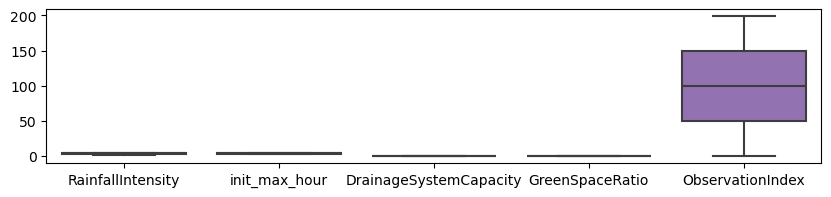

In [424]:
plt.figure(figsize=(10, 2))
sns.boxplot(test_parameters_df)

No outliers

In [425]:
test_combined_df = pd.merge(test_parameters_df, test_merged_df)
print(test_combined_df.shape); test_combined_df.head()

(38200, 14)


,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,head_id,tail_id,longitude,latitude,altitude,flooded_init,high_risk,min_distance_to_flooded
0,D,4,4,0.22,0.28,0,151779659,153066427,-95.382821,29.798740,957.0,True,True,0.002613
1,D,4,4,0.22,0.28,0,151779659,152426116,-95.383237,29.798445,921.2,False,True,0.000711
2,D,4,4,0.22,0.28,0,151779659,152136099,-95.382354,29.797764,876.0,False,True,0.001443
3,D,4,4,0.22,0.28,0,151779763,152437059,-95.380082,29.795224,897.0,False,False,0.001319
4,D,4,4,0.22,0.28,0,151779763,152541741,-95.380394,29.796295,877.6,False,False,0.002078


In [426]:
test_encoded = pd.concat([pd.get_dummies(test_combined_df.SurfaceType), test_combined_df.drop(['SurfaceType'], axis=1)], axis=1)
print(test_encoded.shape); test_encoded.head()

(38200, 17)


,A,B,C,D,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,head_id,tail_id,longitude,latitude,altitude,flooded_init,high_risk,min_distance_to_flooded
0,False,False,False,True,4,4,0.22,0.28,0,151779659,153066427,-95.382821,29.798740,957.0,True,True,0.002613
1,False,False,False,True,4,4,0.22,0.28,0,151779659,152426116,-95.383237,29.798445,921.2,False,True,0.000711
2,False,False,False,True,4,4,0.22,0.28,0,151779659,152136099,-95.382354,29.797764,876.0,False,True,0.001443
3,False,False,False,True,4,4,0.22,0.28,0,151779763,152437059,-95.380082,29.795224,897.0,False,False,0.001319
4,False,False,False,True,4,4,0.22,0.28,0,151779763,152541741,-95.380394,29.796295,877.6,False,False,0.002078


In [427]:
import pickle
with open('random_forest.pkl', 'rb') as file:
    loaded_classifier = pickle.load(file)

In [428]:
test_pred = loaded_classifier.predict(test_encoded)
test_pred

array([ True,  True,  True, ...,  True, False, False])

In [429]:
test_encoded['flooded_final'] = test_pred
print(test_encoded.shape); test_encoded.head()

(38200, 18)


,A,B,C,D,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,head_id,tail_id,longitude,latitude,altitude,flooded_init,high_risk,min_distance_to_flooded,flooded_final
0,False,False,False,True,4,4,0.22,0.28,0,151779659,153066427,-95.382821,29.798740,957.0,True,True,0.002613,True
1,False,False,False,True,4,4,0.22,0.28,0,151779659,152426116,-95.383237,29.798445,921.2,False,True,0.000711,True
2,False,False,False,True,4,4,0.22,0.28,0,151779659,152136099,-95.382354,29.797764,876.0,False,True,0.001443,True
3,False,False,False,True,4,4,0.22,0.28,0,151779763,152437059,-95.380082,29.795224,897.0,False,False,0.001319,False
4,False,False,False,True,4,4,0.22,0.28,0,151779763,152541741,-95.380394,29.796295,877.6,False,False,0.002078,False


In [430]:
# Creating new directory
output_dir = 'test_set_predictions'
os.makedirs(output_dir, exist_ok=True)

for index in test_encoded['ObservationIndex'].unique():
    # Filter the DataFrame for the current observation index
    subset_df = test_encoded[test_encoded['ObservationIndex'] == index]

    # Select only the required columns
    subset_df = subset_df[['head_id', 'tail_id', 'flooded_init', 'flooded_final']]

    # Define the file name
    file_name = os.path.join(output_dir, f'test_{index}.csv')

    # Save to CSV
    subset_df.to_csv(file_name, index=False)